In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


         
    “”“
    
    随机森林
    
    ”“”
    

In [19]:
#make_moon数据集
X,y = make_moons(n_samples=100,noise=0.5,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [20]:
import mglearn

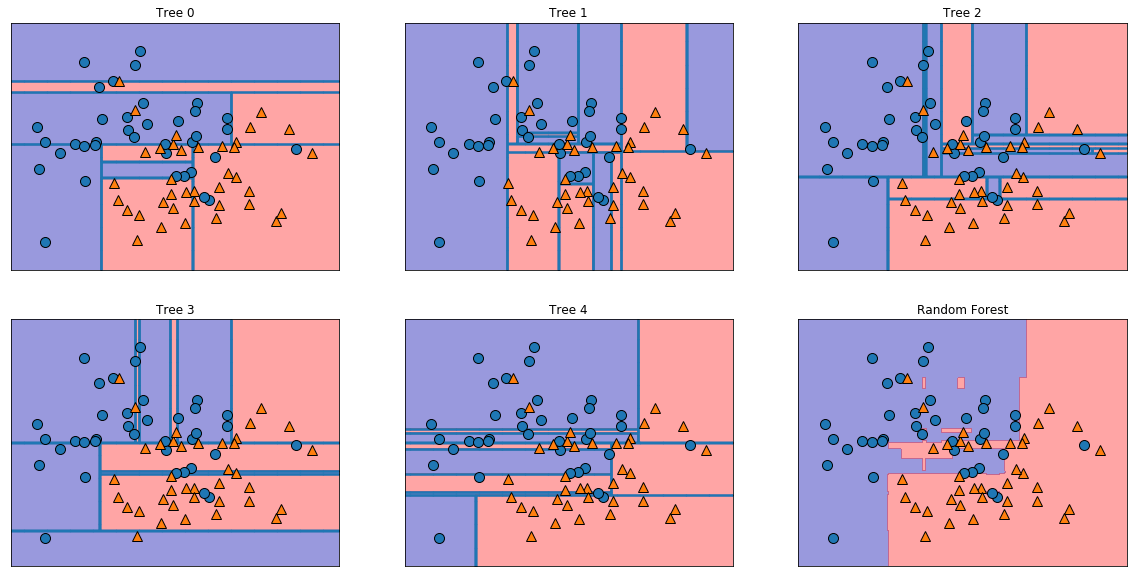

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 


In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [23]:
#癌症数据集
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
print("Accuracy on training set:{:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on testing set:0.972


        """
       特征重要性可视化
       定义函数，调用函数
        “”“

In [25]:
from sklearn.tree import export_graphviz
import graphviz

In [26]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

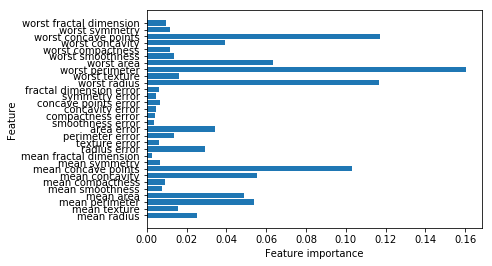

In [27]:
plot_feature_importances_cancer(forest)

“”“

随机森林分类&回归优点：

    调参数简单，无需对数据进行标准化
    随机森林解释比单枝决策树更难
    

参数调节：

    对于有多个cou内核的电脑，n_jobs 可以设置使用cores的数量来进行线性加速，n_jobs=-1表示使用电脑中所有
    n_estimators 随机森林使用决策树数量，越大越好，但也意味着对内存的要求以及计算时间延长
    减枝策略 max_depth 决策树深度
    max_features 决定每棵树的随机性，对于分类：默认设置max_feature=sqrt ，对于回归；默认log2
    max_feature 和 max_leaf_nodes 越大模型表现越好，能够降低对于模型训练和预测对时间和空间的要求
    
    
注意：   

    在随机森林中，random_state设置与否对于结果有很大影响
 
 
缺点：

    不适用于 “高纬度 或者 稀疏“ 数据集，比如文本数据（这种特点的数据集线性模型分类效果更好）
    在比较大的数据集上，随机森林可以达到高的准确度，但是对于时间和空间的消耗比较高，此时，如果题目在内存和时间方面要求较高可使用线性模型。

“”“    
   

                        “”“
    
    
                      梯度提升树（GBDT）
        
        
                        ”“”

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on testing set:0.958


In [31]:
#出现过拟合，采用预剪枝策略之一：限制最大深度
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [32]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on testing set:0.965


In [33]:
#预减枝策略之二：降低学习率
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [34]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on testing set:0.972


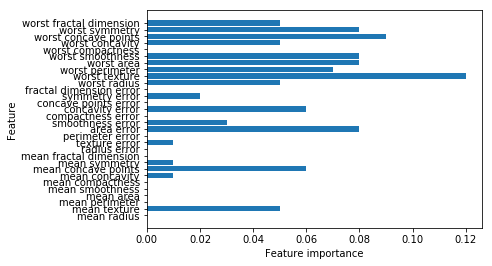

In [35]:
#特征重要性可视化
plot_feature_importances_cancer(gbrt)


"""

梯度提升树缺点：

    调参数要求较高，训练时间较长
    不适用于高维数据集，稀疏数据集
    
优点：

    无需对数据进行标准化处理，可适用于二类或者连续特征数据集
    
 主要参数：
 
    n_estimator 使用决策树数目（随机森林下越高越好），但是在这里越大模型更复杂，GBDT中会带来过拟合
    learning_rate 决定决策树对于前面预测错误数据的修正程度，优先调节n_estimator
    max_depth 为了降低单颗树的复杂度，在GBDT中，默认比较小，一般不超过5
    
"""


                """

               支持向量机


                 """


Text(0,0.5,'Feature 1')

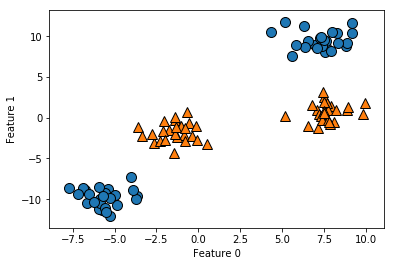

In [43]:
from mglearn.make_blobs  import make_blobs
X, y = make_blobs(centers=4, random_state=8) 
y=y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

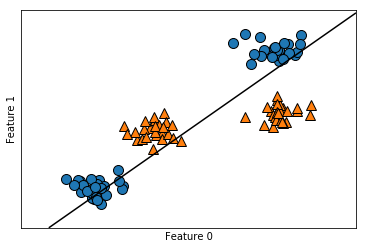

In [44]:
from sklearn.svm import LinearSVC 
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'feature1 ** 2')

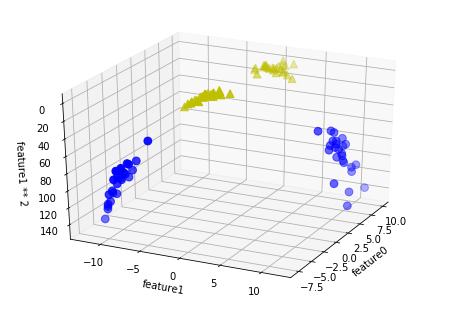

In [68]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d 
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
 # plot first all the points with y == 0, then all with y == 1
mask=y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='y', marker='^',cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5,0,'feature0 ** 2')

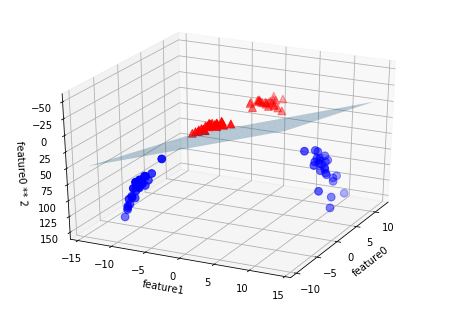

In [88]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

 # show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
               cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

Text(0,0.5,'Feature 1')

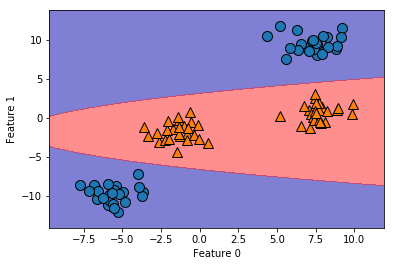

In [96]:
ZZ=YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) 
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

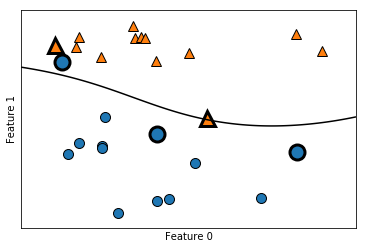

In [117]:
#RBF核函数支持向量机决策面和支持向量
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#plot support vectors
sv = svm.support_vectors_
#class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

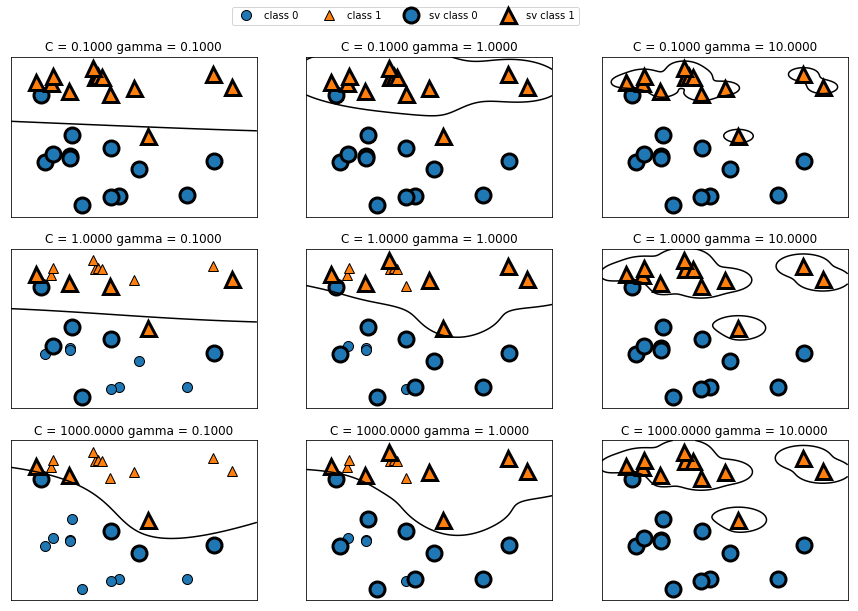

In [140]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
            mglearn.plots.plot_svm(log_C=C, log_gamma=gamma,ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],ncol=4, loc=(.9, 1.2))

                            gamman越大，模型复杂度越高，c越大分类效果越好

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)
print("shape of cancer data:{}".format(cancer.data.shape))
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

shape of cancer data:(569, 30)
Accuracy on training set: 1.00
Accuracy on test set: 0.63


默认使用RBF核函数，过拟合严重，SVM对于参数敏感，并且要求所有特征有相同的变化规模。考虑对数据进行标准化处理

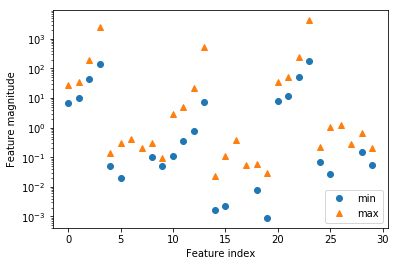

In [145]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

Feature ranges for the Breast Cancer dataset (note that the y axis has a log‐ arithmic scale)
 
 癌症数据集有30个特征，发现各个特征的取值范围有很大差距，考虑对数据进行预处理

                                
                                Preprocessing data for SVMs
                                

In [148]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set 
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training 
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0))) 
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [149]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details) 
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


表现非常好，有些欠拟合，采取调参方式提高模型复杂度，参数有gamma和C，c控制模型复杂度，增大C值

In [151]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972



“”“

优点：
    
    适用于高维、低维数据集；
    
    当数据的特征规模相同时可以考虑使用SVM，当样本为图像数据时，特征为像素点，适合采用SVM
    
    
缺点：
    
    当样本量在10000左右时svm表现非常好，但是当数据集大于100000时，对内存要求较高且训练缓慢；
    
    使用svm需要对数据进行预处理，并且模型表现对参数比较敏感
    
    模型难以解释
    
    
参数：
    
    SVM中最常使用的核函数为RBF核函数，rbf核函数有一个参数gamma，（is the inverse of the width of the Gaus‐ sian kernel）
 gamma和C同时控制着模型的复杂度，越高模型越复杂，gamma和C高度相关，调参数时需要对它们同时调整。
 
 “”“
 
    

                            Neural Networks (Deep Learning)

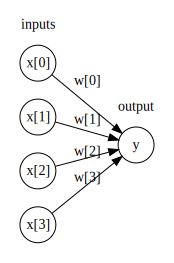

In [152]:
display(mglearn.plots.plot_logistic_regression_graph())

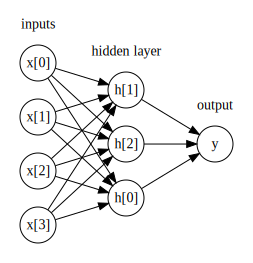

In [158]:
#有一个隐藏层的多层感知机
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

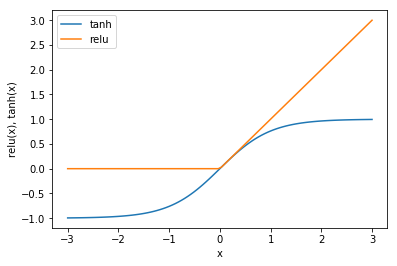

In [155]:
#比较两种不同的激活函数
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

 e hyperbolic tangent activation function and the recti ed linear activa‐ tion function

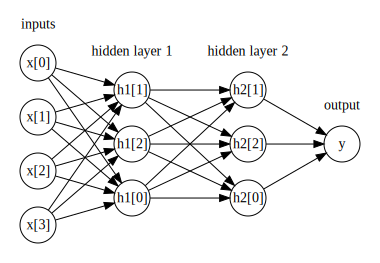

In [157]:
#A multilayer perceptron with two hidden layers，2个隐藏层的多层感知机
mglearn.plots.plot_two_hidden_layer_graph()

Text(0,0.5,'Feature 1')

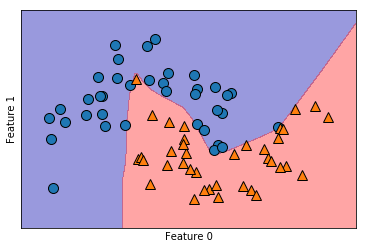

In [177]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                        random_state=42)

mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Decision boundary learned by a neural network with 100 hidden units on the two_moons dataset

Text(0,0.5,'Feature 1')

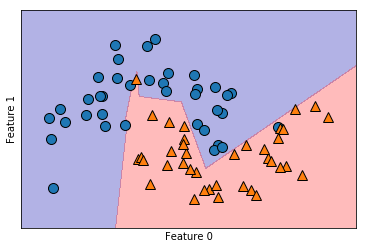

In [180]:
#默认隐藏层节点数为100，降低隐藏节点数目
mlp = MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Decision boundary learned by a neural network with 10 hidden units on the two_moons dataset

Text(0,0.5,'Feature 1')

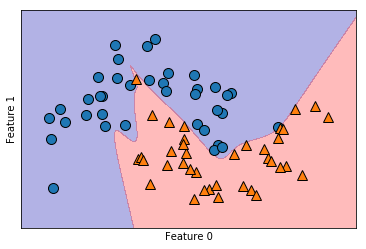

In [175]:
#默认激活函数为relu,使用tanh激活函数
mlp = MLPClassifier(solver='lbfgs',activation='tanh',
                        random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Decision boundary learned using 2 hidden layers with 10 hidden units each, with rect activation function

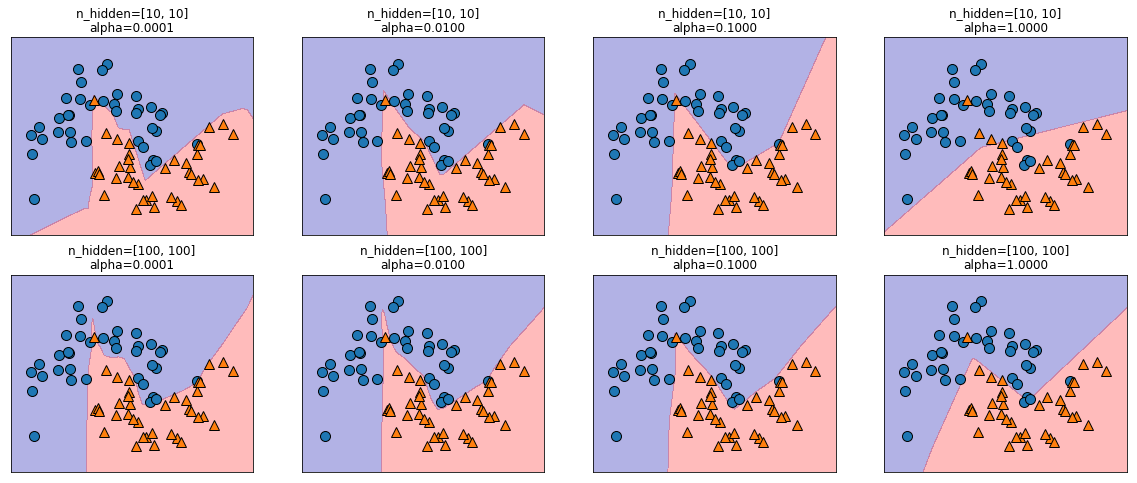

In [185]:
#使用L2正则式来使权重降低为0，在MLP中通过alpha参数设置L2，默认该值很小
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                                hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                                alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                          n_hidden_nodes, n_hidden_nodes, alpha))

Decision functions for di erent numbers of hidden units and di erent set‐ tings of the alpha parameter

需要注意的是在训练模型之前，参数采取随机初始化方式，当随机数种子设置不同时候，每次会得到不同的模型，当网络很大，随机初始化对正确率影响不大，当
当网络结构较小时，影响较大

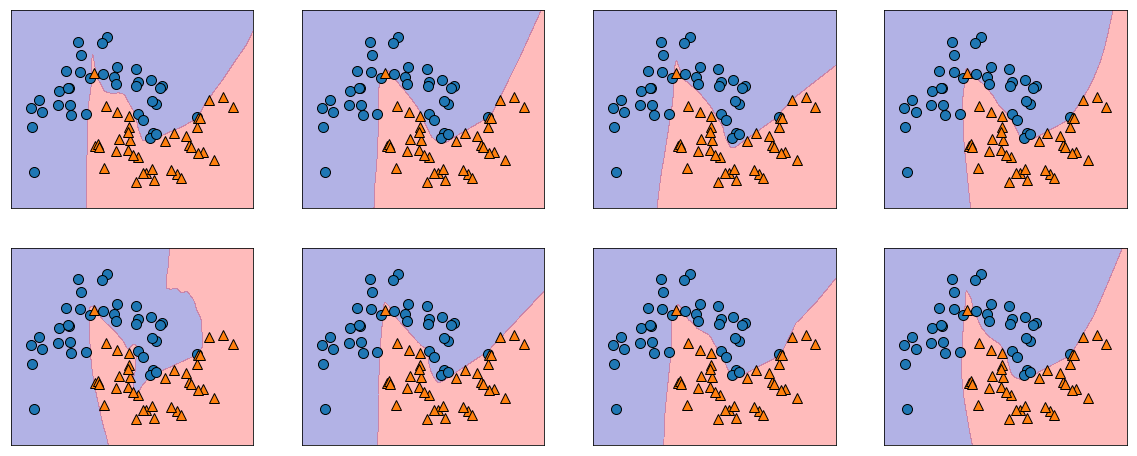

In [191]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                            hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

Decision functions learned with the same parameters but di erent random initializations


In [194]:
# 在癌症数据集上使用多层感知机模型
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))


Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [196]:
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


出现过拟合，神经网络模型SVM类似，对特征的规模比较敏感，使用StandardScaler标准化，使得输入数据特征0均值1方差

In [199]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set 
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set 
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [202]:
#增加迭代次数
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


训练集和测试集准确率有较大差距，考虑降低模型复杂度，加大惩罚参数alpha

In [203]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


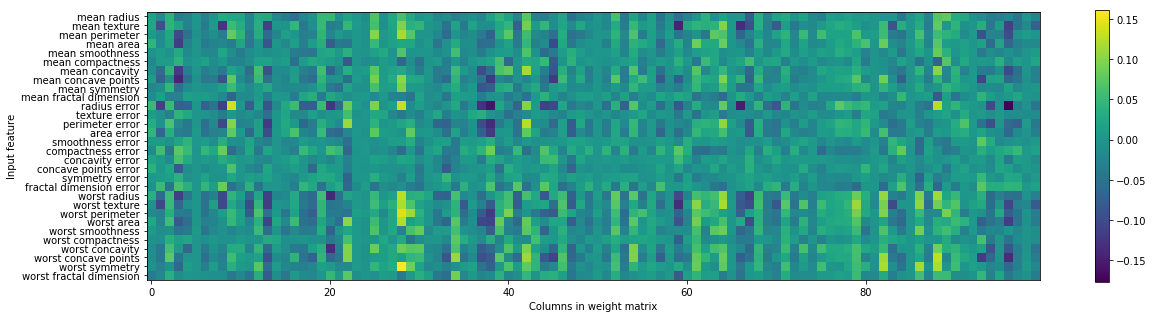

In [204]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

Heat map of the  rst layer weights in a neural network learned on the Breast Cancer dataset


"""

优点：

    当数据集较大时候也适用，可建立相对复杂模型
    
    当计算时间充足，数据预处理得当，参数设置合适时候，MLP可以打败其他简单分类器
    
缺点：

    当网络复杂时训练时间较长
    
    只适用于当样本特征意思相似相似的homogeneous数据，当特征类型不同时候，基于决策树的模型更适合
    
    调参数是一门艺术
    
    在我们的模型中，参数关注点在 number of layers and nodes 和 正则化参数以及非线性，这定义了我们需要学习的模型，
    但是有些参数定义了如何去学习模型：
    
    lbfgs: rubost but take a long time to on lager datasets
    
    adm:  default value, sensitive to the scaling of the data(需要对数据进行标准化)
    
    sgd: 在深度学习模型中使用较多，附带很多其他参数
    
       
“”“
